# DATA ANALYSIS NOTEBOOK
Felix A. Westphal
DLMDWME01

### Import

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

### Parameter

In [27]:
FILE_PATH_INPUT_DATA = r"../data/processed/Cleaned_Input_Data.csv"

### Plot Style

In [28]:
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

### Load Data

In [29]:
input_data = pd.read_csv(FILE_PATH_INPUT_DATA)                        # Load input data file
print(input_data)

                      tmsp      country  amount  success         PSP  \
0      2019-01-01 00:01:11      Germany    89.0    False     UK_Card   
1      2019-01-01 00:01:17      Germany    89.0     True     UK_Card   
2      2019-01-01 00:02:49      Germany   238.0    False     UK_Card   
3      2019-01-01 00:03:13      Germany   238.0     True     UK_Card   
4      2019-01-01 00:04:33      Austria   124.0    False  Simplecard   
...                    ...          ...     ...      ...         ...   
50405  2019-02-28 23:45:39  Switzerland   415.0    False     UK_Card   
50406  2019-02-28 23:46:48      Austria    91.0    False     UK_Card   
50407  2019-02-28 23:47:04      Austria    91.0    False     UK_Card   
50408  2019-02-28 23:47:36      Austria    91.0    False     UK_Card   
50409  2019-02-28 23:48:19      Austria    91.0     True   Moneycard   

       3D_secured    card  
0           False    Visa  
1           False    Visa  
2            True  Diners  
3            True  Dine

### Statistical Analysis of Input Data

In [30]:
def get_statistics(column_header, num_round=3):
    min = np.round(np.min(input_data[column_header]), num_round)
    max = np.round(np.max(input_data[column_header]), num_round)
    mean = np.round(np.mean(input_data[column_header]), num_round)
    std = np.round(np.std(input_data[column_header]), num_round)
    return min, max, mean, std
amount_min, amount_max, amount_mean, amount_std = get_statistics("amount", num_round=2)

num_entries = len(input_data.index)
num_success = len(input_data[input_data["success"] == True].index)
num_secured = len(input_data[input_data["3D_secured"] == True].index)
rel_success = np.round((num_success/num_entries) * 100, 2)
rel_secured = np.round((num_secured/num_entries) * 100, 2)

num_psp_moneycard = len(input_data[input_data["PSP"] == "Moneycard"].index)
num_psp_goldcard = len(input_data[input_data["PSP"] == "Goldcard"].index)
num_psp_ukcard = len(input_data[input_data["PSP"] == "UK_Card"].index)
num_psp_simplecard = len(input_data[input_data["PSP"] == "Simplecard"].index)

num_card_master = len(input_data[input_data["card"] == "Master"].index)
num_card_visa = len(input_data[input_data["card"] == "Visa"].index)
num_card_diners = len(input_data[input_data["card"] == "Diners"].index)

print(f"========== STATISTICS OF INPUT DATA ==========")
print(f"Number of transactions: {num_entries}")
print(f"Number of successful transactions: {num_success} / {rel_success}%")
print(f"Number of 3D secured transactions: {num_secured} / {rel_secured}%")
print(f"Amount Min, Max, Mean, Std: {amount_min}€, {amount_max}€, {amount_mean}€, {amount_std}€")
print(f"\n======== PANDAS DATA FRAME STATISTICS ========")
print(f"Data Frame Description: \n{input_data.describe()}")
print(f"Data Frame Summary: \n{input_data.info()}")

========== STATISTICS OF INPUT DATA ==========
Number of transactions: 50410
Number of successful transactions: 10228 / 20.29%
Number of 3D secured transactions: 12011 / 23.83%
Amount Min, Max, Mean, Std: 6.0€, 630.0€, 202.4€, 96.27€

======== PANDAS DATA FRAME STATISTICS ========
Data Frame Description: 
             amount
count  50410.000000
mean     202.395715
std       96.274730
min        6.000000
25%      133.000000
50%      201.000000
75%      269.000000
max      630.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tmsp        50410 non-null  object 
 1   country     50410 non-null  object 
 2   amount      50410 non-null  float64
 3   success     50410 non-null  bool   
 4   PSP         50410 non-null  object 
 5   3D_secured  50410 non-null  bool   
 6   card        50410 non-null  object 
dtypes: bool(2), float64(1), object(

#### Histograms

========== HISTOGRAMS OF INPUT DATA ==========


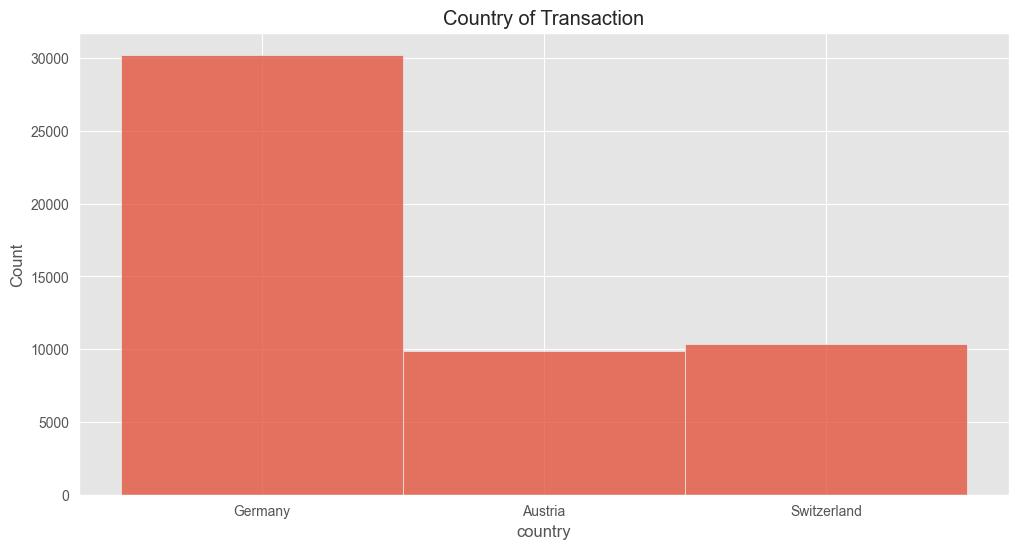

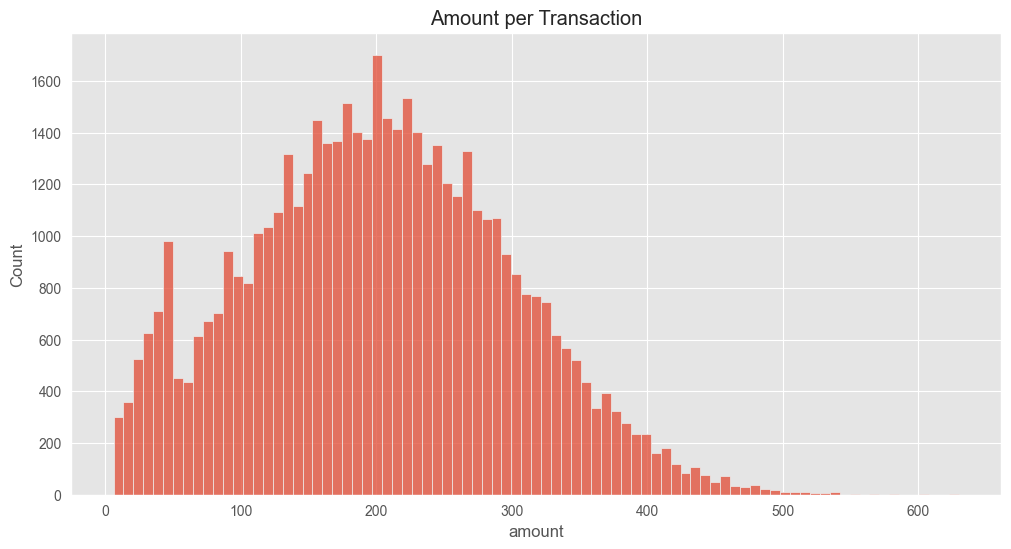

In [31]:
print(f"========== HISTOGRAMS OF INPUT DATA ==========")
plt.title("Country of Transaction")
sns.histplot(data=input_data, x="country")
plt.show()

plt.title("Amount per Transaction")
sns.histplot(data=input_data, x="amount")
plt.show()

#### Pie Charts

========== PIE CHARTS OF INPUT DATA ==========


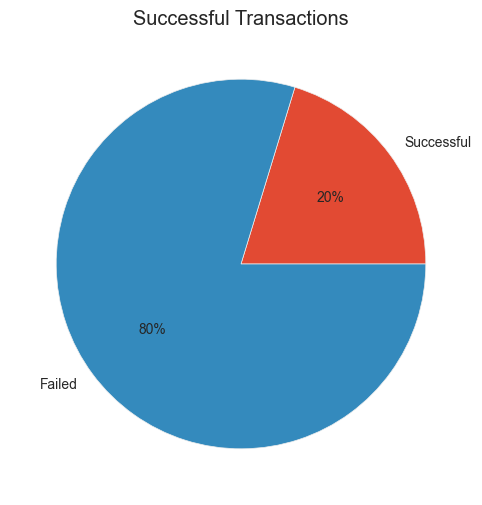

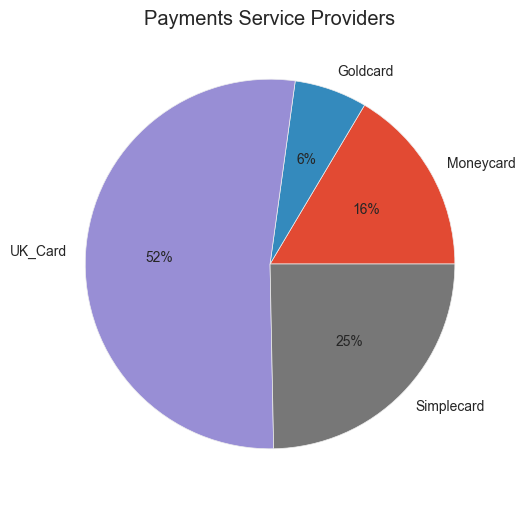

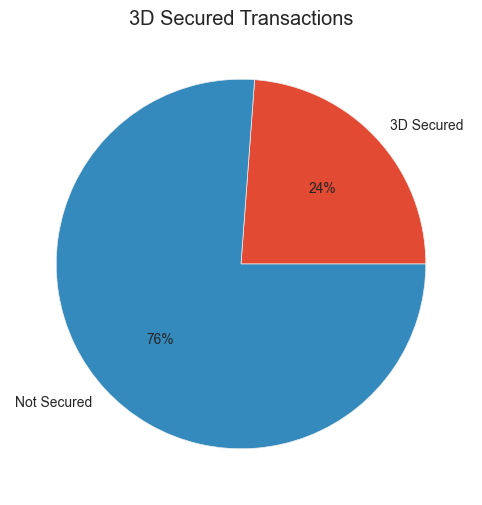

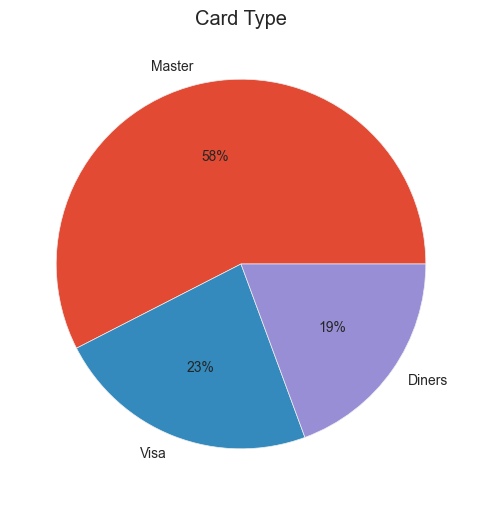

In [32]:
print(f"========== PIE CHARTS OF INPUT DATA ==========")
plt.title("Successful Transactions")
plt.pie([num_success, num_entries - num_success], labels=["Successful", "Failed"], autopct='%.0f%%')
plt.show()

plt.title("Payments Service Providers")
plt.pie([num_psp_moneycard, num_psp_goldcard, num_psp_ukcard, num_psp_simplecard], labels=["Moneycard", "Goldcard", "UK_Card", "Simplecard"], autopct='%.0f%%')
plt.show()

plt.title("3D Secured Transactions")
plt.pie([num_secured, num_entries - num_secured], labels=["3D Secured", "Not Secured"], autopct='%.0f%%')
plt.show()

plt.title("Card Type")
plt.pie([num_card_master, num_card_visa, num_card_diners], labels=["Master", "Visa", "Diners"], autopct='%.0f%%')
plt.show()

### Correlation Matrix for numerical Columns

========== CORRELATION MATRIX OF INPUT DATA ==========


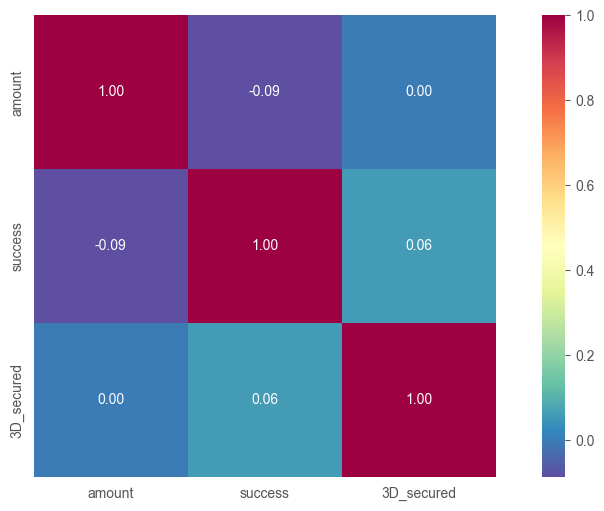

In [44]:
print(f"========== CORRELATION MATRIX OF INPUT DATA ==========")
corrmat = input_data.corr(method="pearson")
np.round(corrmat,2)
hm = sns.heatmap(corrmat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 cmap="Spectral_r")

### Relationship between Variables - Pair Plot
#### Numerical Data only

========== PAIR PLOT OF INPUT DATA ==========


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


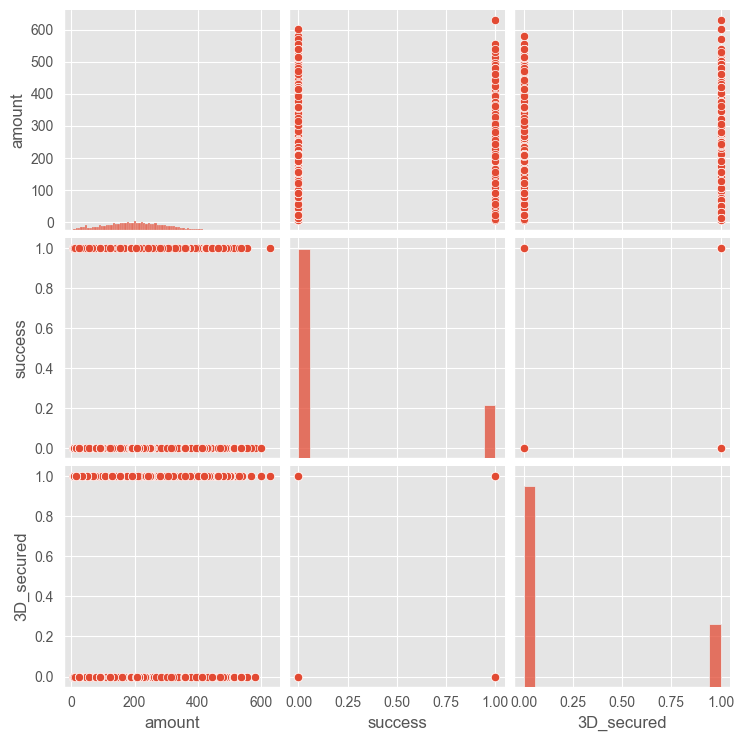

In [34]:
print(f"========== PAIR PLOT OF INPUT DATA ==========")
sns.pairplot(input_data)

### Relationship between Variables - Box Plot
#### Categorical Variables

========== BOX PLOTS OF INPUT DATA ==========


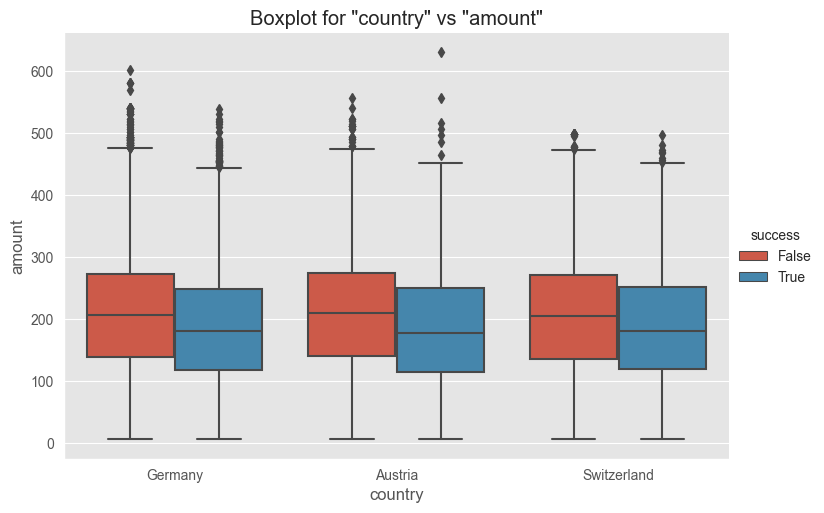

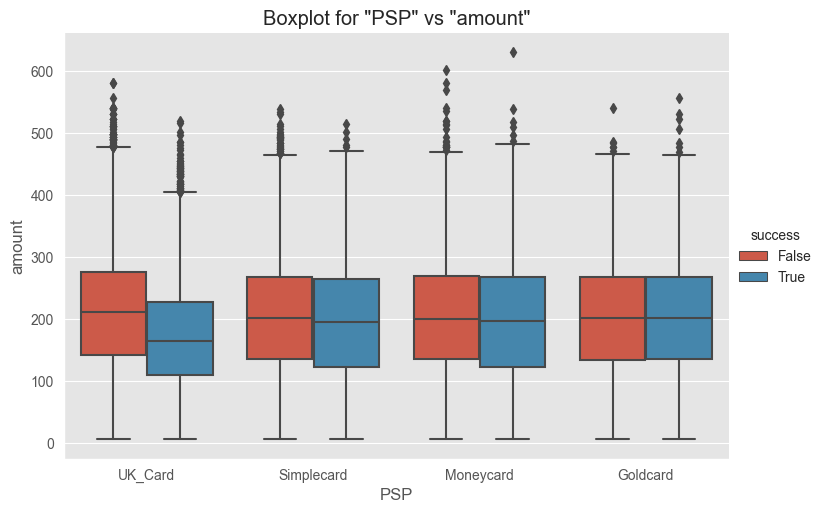

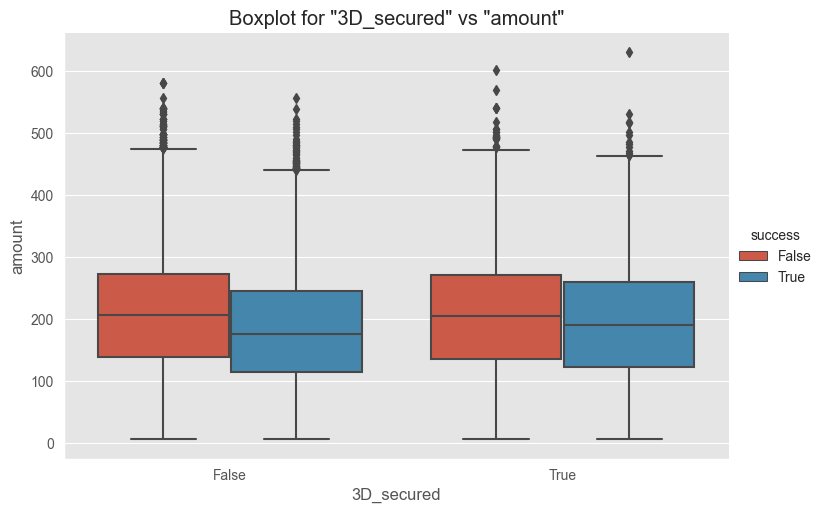

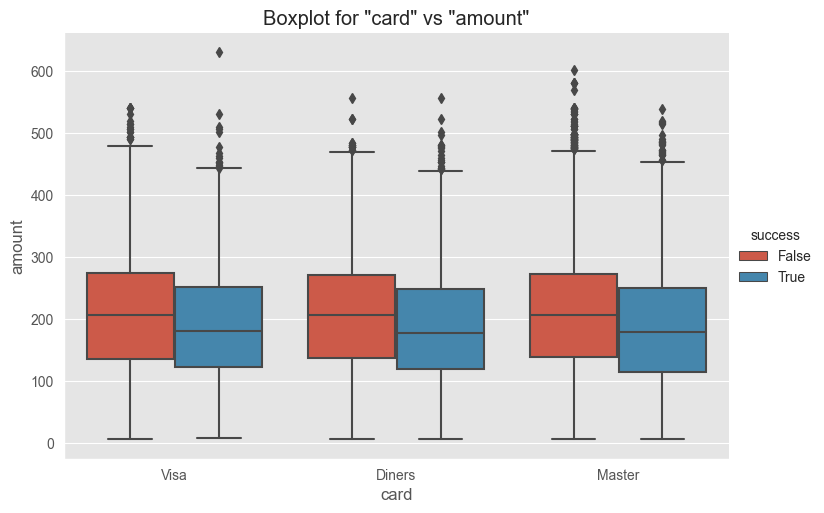

In [35]:
print(f"========== BOX PLOTS OF INPUT DATA ==========")
sns.catplot(x="country", y="amount", hue="success", data=input_data, kind="box", aspect=1.5)
plt.title("Boxplot for \"country\" vs \"amount\"")
plt.show()

sns.catplot(x="PSP", y="amount", hue="success", data=input_data, kind="box", aspect=1.5)
plt.title("Boxplot for \"PSP\" vs \"amount\"")
plt.show()

sns.catplot(x="3D_secured", y="amount", hue="success", data=input_data, kind="box", aspect=1.5)
plt.title("Boxplot for \"3D_secured\" vs \"amount\"")
plt.show()

sns.catplot(x="card", y="amount", hue="success", data=input_data, kind="box", aspect=1.5)
plt.title("Boxplot for \"card\" vs \"amount\"")
plt.show()

### Relationship between Variables and Success Rate - Grouped Bar Plot


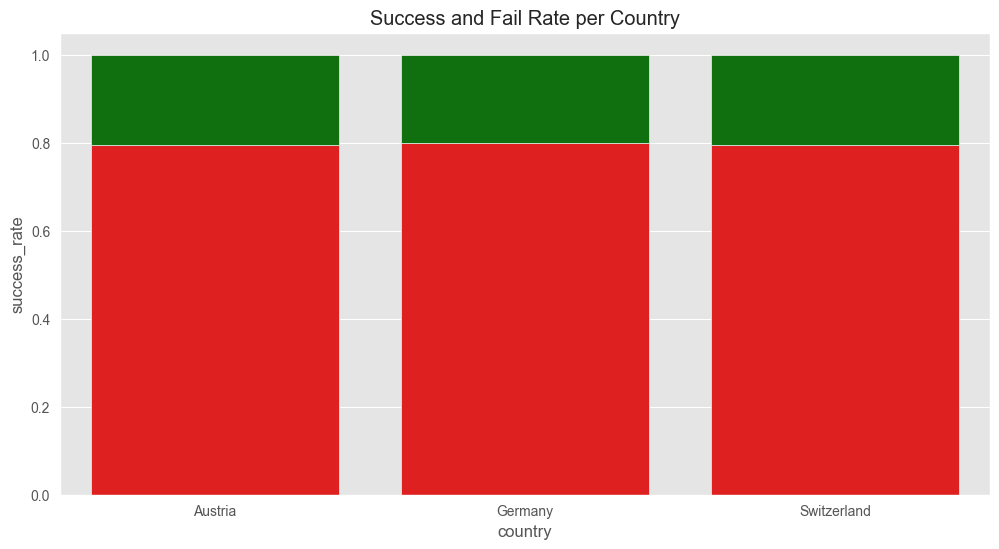

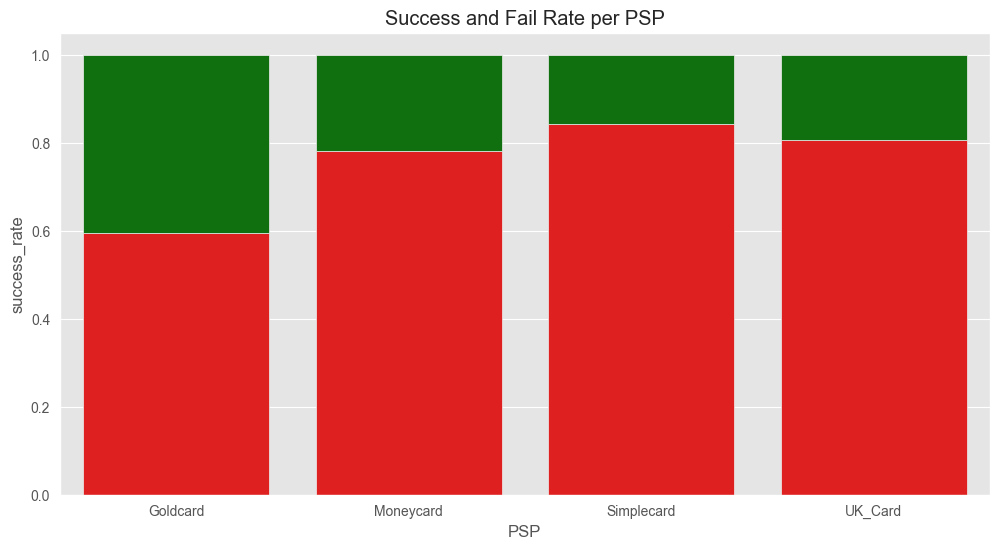

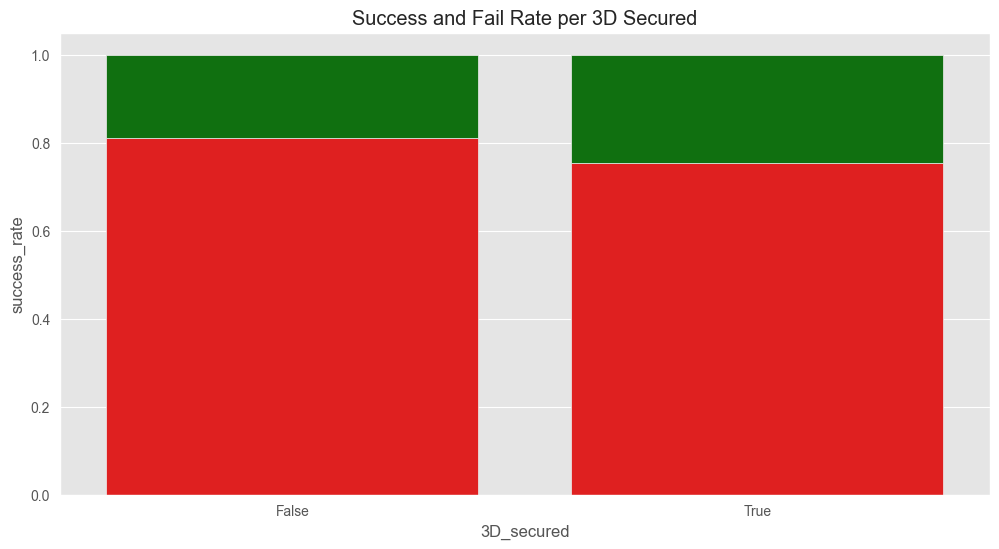

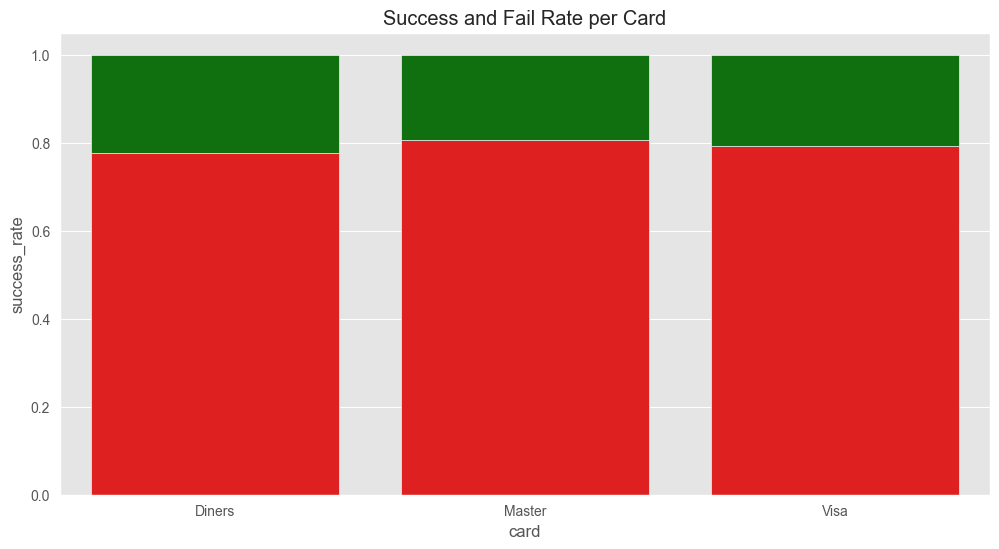

In [53]:
# --- Success Rate Calculation
country_success = input_data.groupby(['country', 'success']).size().reset_index(name='count')                                                                           # Group the input data by country and success
success_rate_country = country_success.groupby('country').apply(lambda x: x[x['success'] == True]['count'].sum() / x['count'].sum()).reset_index(name='success_rate')   # Calculate the success rate per country
failed_rate_country = country_success.groupby('country').apply(lambda x: x[x['success'] == False]['count'].sum() / x['count'].sum()).reset_index(name='failed_rate')    # Calculate the fail rate per country
rates_country = pd.merge(success_rate_country, failed_rate_country, on='country')                                                                                       # Merge fail and pass

psp_success = input_data.groupby(['PSP', 'success']).size().reset_index(name='count')
success_rate_psp = psp_success.groupby('PSP').apply(lambda x: x[x['success'] == True]['count'].sum() / x['count'].sum()).reset_index(name='success_rate')
failed_rate_psp = psp_success.groupby('PSP').apply(lambda x: x[x['success'] == False]['count'].sum() / x['count'].sum()).reset_index(name='failed_rate')
rates_psp = pd.merge(success_rate_psp, failed_rate_psp, on='PSP')

secured_success = input_data.groupby(['3D_secured', 'success']).size().reset_index(name='count')
success_rate_secured = secured_success.groupby('3D_secured').apply(lambda x: x[x['success'] == True]['count'].sum() / x['count'].sum()).reset_index(name='success_rate')
failed_rate_secured = secured_success.groupby('3D_secured').apply(lambda x: x[x['success'] == False]['count'].sum() / x['count'].sum()).reset_index(name='failed_rate')
rates_secured = pd.merge(success_rate_secured, failed_rate_secured, on='3D_secured')

card_success = input_data.groupby(['card', 'success']).size().reset_index(name='count')
success_rate_card = card_success.groupby('card').apply(lambda x: x[x['success'] == True]['count'].sum() / x['count'].sum()).reset_index(name='success_rate')
failed_rate_card = card_success.groupby('card').apply(lambda x: x[x['success'] == False]['count'].sum() / x['count'].sum()).reset_index(name='failed_rate')
rates_card = pd.merge(success_rate_card, failed_rate_card, on='card')

# --- Result Plots
ax = sns.barplot(x='country', y='failed_rate', data=rates_country, color='red')
sns.barplot(x='country', y='success_rate', data=rates_country, color='green', ax=ax, bottom=rates_country['failed_rate'])
plt.title('Success and Fail Rate per Country')
plt.show()

ax = sns.barplot(x='PSP', y='failed_rate', data=rates_psp, color='red')
sns.barplot(x='PSP', y='success_rate', data=rates_psp, color='green', ax=ax, bottom=rates_psp['failed_rate'])
plt.title('Success and Fail Rate per PSP')
plt.show()

ax = sns.barplot(x='3D_secured', y='failed_rate', data=rates_secured, color='red')
sns.barplot(x='3D_secured', y='success_rate', data=rates_secured, color='green', ax=ax, bottom=rates_secured['failed_rate'])
plt.title('Success and Fail Rate per 3D Secured')
plt.show()

ax = sns.barplot(x='card', y='failed_rate', data=rates_card, color='red')
sns.barplot(x='card', y='success_rate', data=rates_card, color='green', ax=ax, bottom=rates_card['failed_rate'])
plt.title('Success and Fail Rate per Card')
plt.show()